
**Assignment 1: Simulations (Given: 17 Jan 2023, Due: 31 Jan 2023  2pm)**
    

**General instructions**

* Solutions are to be typed in the `.ipynb` file provided and uploaded in the lab course page in Moodle before the due date. 
* Your code should be well commented and should be compatible with python3.
* For this assignment, you are allowed to import the libraries `random` and `mathplotlib` of python3. No other libraries may be imported.
* For questions involving constructing plots, sample outputs may be provided. Your answers need not exactly match them. However if your plots are significantly deviating from what is given, it is possibily an indication that your code is doing something incorrect.

# Law of Large Numbers

(a)  Write a function `simulateDice(n)` that rolls a six-sided die $n$ times and returns the frequencies of the results, i.e., the number of times 1 appears, the no. of times 2 appears, etc. 

In [4]:
import random as r #importing random library
import matplotlib.pyplot as plt #pyplot module from matplotlib

die = [1,2,3,4,5,6] #representing 6 sided die

def simulateDice(n):
    '''roll six-sided die -n- times and return frequencies of the result'''
    freq = [0,0,0,0,0,0]
    for i in range(n):
        temp = r.choice(die) #using choice method of random for simulating random results
        freq[temp-1]+=1 #incrementing the corresponding frquencies
    return freq

(b) For each $n \in \{6,6^2,60,600,6 \times 10^{6}\}$, run `simulateDice(n)` and plot a bar chart with outcomes of die rolls against the frequencies. A sample output looks as follows. 


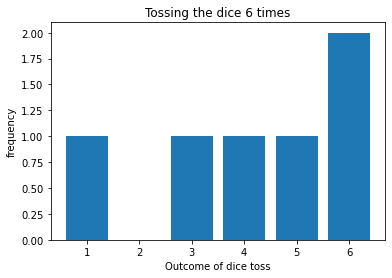

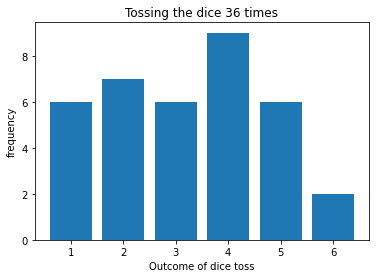

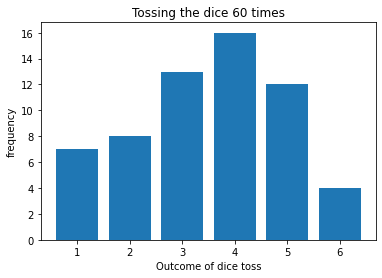

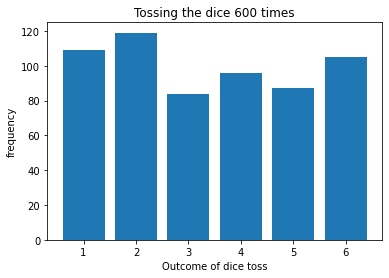

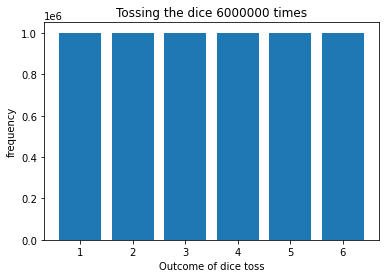

In [6]:
n = [6,6**2,60,600,6*(10**6)] #given set of -n-

for each in n:
    x = die #x-axis shows outcome
    y = simulateDice(each) #y axis for frequencies
    plt.bar(x,y) #ploting the graph using pyplot
    plt.title(f"Tossing the dice {each} times") #title of the plot
    plt.xlabel("Outcome of dice toss") #label for x-axis
    plt.ylabel("frequency") #label for y-axis
    plt.show() #displaying the plot

(c)  Write a function `avgDice(n)` that calls `simulateDice(n)` and compute the average of the $n$ outcomes. Run avgDice(n) 1000 times and plot a bar chart with iterations (i.e., 1 to 1000) against the average values. A sample output looks for $n = 10$ as follows. 


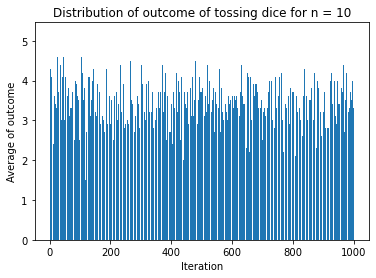

In [11]:
n = 10

def avgDice(n):
    '''calls simulateDice(n) and compute the average of the n outcomes'''
    freq = simulateDice(n) #call the simulateDice function
    #now calculate the average
    sum = 0
    for i in range(6):
        sum = sum + (freq[i]*die[i]) #adding all the outcomes
    avg = sum/n
    return avg

# getting points for the plot
x = []
y = []
for i in range(1000):
    x.append(i+1)
    y.append(avgDice(n))
#plotting the bar graph
plt.bar(x,y)
plt.title(f"Distribution of outcome of tossing dice for n = {n}")
plt.xlabel("Iteration")
plt.ylabel("Average of outcome")
plt.show()

(d) Repeat part (c) for each $n \in \{10^2,10^3,10^5\}$. How does the chart change with $n$? 

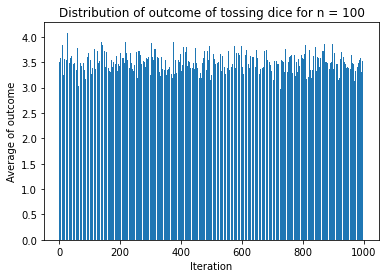

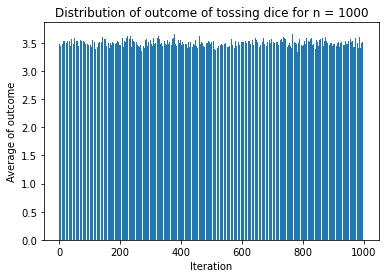

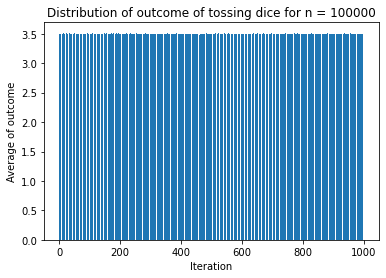

In [14]:
n = [10**2,10**3,10**5] #new set of -n-
for each in n:
    # getting points for the plot
    x = []
    y = []
    for i in range(1000):
        x.append(i+1)
        y.append(avgDice(each))
    #plotting the bar graph
    plt.bar(x,y)
    plt.title(f"Distribution of outcome of tossing dice for n = {each}")
    plt.xlabel("Iteration")
    plt.ylabel("Average of outcome")
    plt.show()

### Observation: when n increases average shift towards 3.5

# Birthday Paradox

(a) Write a function `simulateBday(n)` that generates $n$ random birthdays (i.e., $n$ random integers between 1 and 366) and determines whether there is a pair of same birthdays or not.

In [24]:
def simulateBday(n):
    bdaylist = []
    pairExists = 0 #false
    for i in range(n):
        newbday = r.randint(1,366)
        if newbday in bdaylist:
            pairExists = 1 #true
        bdaylist.append(newbday)
    return pairExists

(b)   Run `simulateBday(n)` 100 times and determine the number $x$ of times that the $n$ birthdays have an equal pair. Treat $x/100$ as the probability of two same birthdays among $n$ random birthdays.

In [41]:
def probability_pairExists(n):
    bool_list = []
    for i in range(100):
        bool_list.append(simulateBday(n))
    x = bool_list.count(1)
    prob = x/100
    return prob

(c) Run `simulateBday(n)` for $n \in [100]$ where $[k]$ denotes the set $\{1,2,\ldots, k\}$.


In [29]:
for n in range(1,101):
    simulateBday(n)

(d) What is the minimum $n$ that guarantees two same birthdays? Identify a range of values of $n$ that makes the probability of two same birthdays greater than $0.5$.


for probability to be greater than 0.5, n= 22


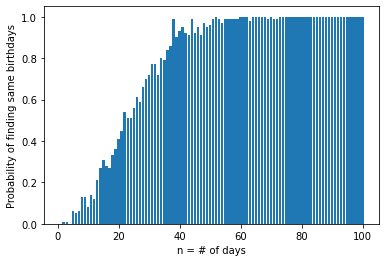

In [55]:
#plotting graph
x = []
y = []
min = True #to find the minimum
for n in range(1,101):
    x.append(n)
    y.append(probability_pairExists(n))
    if (min==True and y[n-1]>0.5):
        print(f"for probability to be greater than 0.5, n= {n}")
        min = False
plt.bar(x,y)
plt.xlabel("n = # of days")
plt.ylabel("Probability of finding same birthdays")
plt.show()

# Monty Hall Game

You are on a game show and given the choice of picking one of the three boxes ($X$, $Y$, $Z$). Two of the boxes are empty and one contains a gift. You pick a box, say $X$, and the host (who knows what is inside each of the boxes) opens another box, say $Y$, which is empty. You now have the option of retaining your choice ($X$) or switching it (to $Z$). Is it to your advantage to switch your choice in order to get the gift? This advantage is defined as the fraction of times switching the choice leads to a win when the game is played 1000 times.

In [62]:
#r.choice([True,False]) # either your box you chose have a gift or not
# host always opens a empty box since host knows what is inside each of the boxes
# other box depends on box you have chosen
# switching is an advantage when the "x" is empty
x = []
for i in range(1000):
    x.append(r.choice([True,False]))
advantage = x.count(False)/1000
print(advantage)

0.52


# Game of Dice

Simulate the following dice game. 

1. Roll two six-sided dice. 
    * If the sum is 7 or 11 on the first roll, you win. 
    * If the sum is 2, 3 or 12 on the first roll, you lose. 
    * If the sum is 4, 5, 6, 8, 9 or 10 on the first roll, that sum becomes your point. 
2. Continue rolling the dice until the sum is 7 (game lost) or equal to your point (game won). 

If $n$ games are played and $q$ of these games are won, then the chance of winning is $q/n$. Sample simulation of the game for $n=10$ is as follows. What is the chance of winning at this game?

In [ ]:
n = 10
die = [1,2,3,4,5,6]    
for each in range(n):
    point = 0

---
Player rolled 1 + 1 = 2
Point is 2
Player loses
---
Player rolled 5 + 3 = 8
Point is 8
Player rolled 6 + 3 = 9
Player rolled 6 + 6 = 12
Player rolled 6 + 5 = 11
Player rolled 5 + 2 = 7
Player loses
---
Player rolled 2 + 4 = 6
Point is 6
Player rolled 5 + 1 = 6
Player wins
---
Player rolled 6 + 3 = 9
Point is 9
Player rolled 3 + 3 = 6
Player rolled 1 + 2 = 3
Player rolled 3 + 4 = 7
Player loses
---
Player rolled 2 + 5 = 7
Point is 7
Player wins
---
Player rolled 6 + 4 = 10
Point is 10
Player rolled 3 + 3 = 6
Player rolled 6 + 1 = 7
Player loses
---
Player rolled 2 + 6 = 8
Point is 8
Player rolled 4 + 1 = 5
Player rolled 4 + 4 = 8
Player wins
---
Player rolled 4 + 5 = 9
Point is 9
Player rolled 3 + 1 = 4
Player rolled 1 + 5 = 6
Player rolled 1 + 6 = 7
Player loses
---
Player rolled 5 + 6 = 11
Point is 11
Player wins
---
Player rolled 3 + 4 = 7
Point is 7
Player wins
---
Total wins =  5


# Central Limit Theorem 

From a set $S=\{1,1,2,3,5,5,5,7,8,10,12\}$ of numbers, pick $n=1$ numbers at random and compute the average. Repeat this $10^5$ times and plot the frequency of the average values (i.e., how many times each average value occurs)  as a histogram. Repeat this experiment with $n \in \{5,10,30,100,1000\}$.

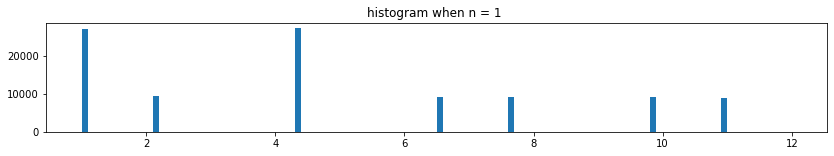

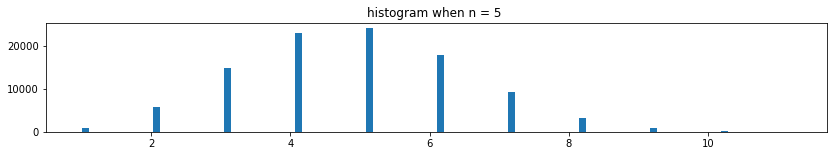

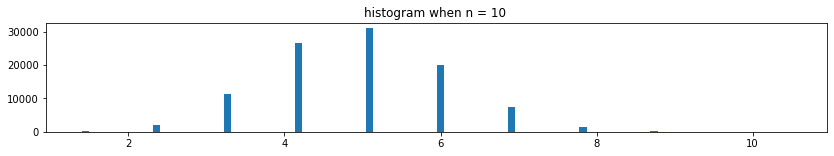

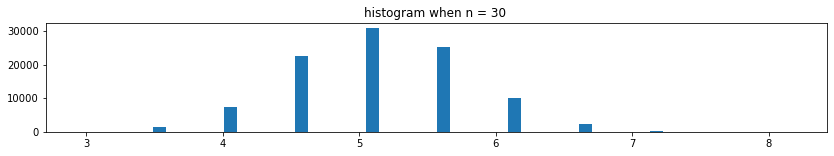

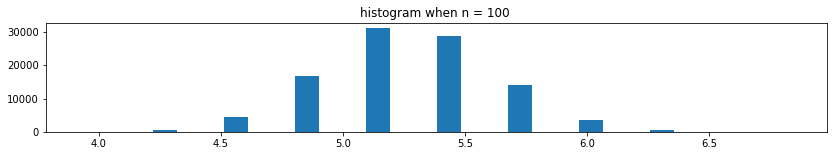

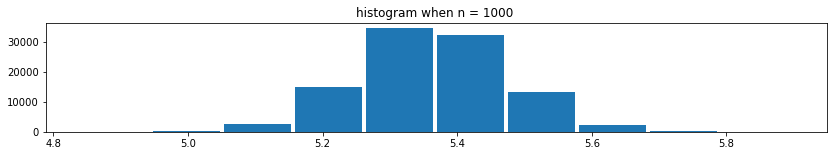

In [74]:
set_s = [1,1,2,3,5,5,5,7,8,10,12]
numbers = [1,5,10,30,100,1000]
plot_num = 0
for n in numbers:
    avg = []
    for i in range(10**5): #repeating 10**5 times
        #randomly picking -n- numbers
        x = r.choices(set_s,k=n)
        #computing avg
        avg.append(sum(x)/n)
    # plotting histogram
    plot_num+=1
    plt.figure(figsize=(14,14))
    plt.subplot(6,1,plot_num)
    plt.hist(avg, width=0.1)
    plt.title(f"histogram when n = {n} ")
    plt.show()